In [66]:
import AAnet
import network
import numpy as np
import AAtools
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline
import tensorflow as tf
import time
import pickle
from sklearn.decomposition import PCA

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
 # load american gut data
data_pickle = pickle.load(open("/Users/david/Dropbox/ARGAN/python/AG/AG.p","rb"))
counts = data_pickle[0]
counts_norm = counts / np.sum(counts, axis=1, keepdims=True)
counts_norm = np.sqrt(counts_norm)
counts_norm = counts_norm / np.max(counts_norm)
counts_norm = (counts_norm * 2) - 1

In [74]:
pca = PCA(n_components=100)
Y_pca = pca.fit_transform(counts_norm)
data = Y_pca

In [95]:
_,idx = np.unique(data_pickle[2], return_inverse=True)

array([0, 0, 0, ..., 0, 0, 0])

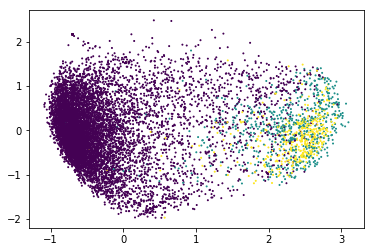

In [97]:
# plot PCA
plt.scatter(Y_pca[:,0], Y_pca[:,1], s=1, c=idx)
plt.show()

In [187]:
# params
num_at = 4
noise_z_std = 0.1
z_dim = [256,128,64,32]
#z_dim = [] # linear AA
act_out = tf.nn.tanh
#act_out = None # linear last layer
input_dim = data.shape[1]

In [188]:
# network
enc_net = network.Encoder(num_at=num_at, z_dim=z_dim)
dec_net = network.Decoder(x_dim=input_dim, noise_z_std=noise_z_std, z_dim=z_dim, act_out=act_out)
model = AAnet.AAnet(enc_net, dec_net)

In [189]:
# train
model.train(data, batch_size=128, num_batches=20000)

Iter [       0] Time [0.3506] loss [0.3525]
Iter [     500] Time [2.3042] loss [0.0196]
Iter [    1000] Time [4.5689] loss [0.0152]
Iter [    1500] Time [6.2411] loss [0.0174]
Iter [    2000] Time [7.9294] loss [0.0170]
Iter [    2500] Time [9.6057] loss [0.0158]
Iter [    3000] Time [11.2703] loss [0.0132]
Iter [    3500] Time [13.0057] loss [0.0180]
Iter [    4000] Time [14.6680] loss [0.0153]
Iter [    4500] Time [16.3204] loss [0.0136]
Iter [    5000] Time [17.9941] loss [0.0144]
Iter [    5500] Time [19.6321] loss [0.0149]
Iter [    6000] Time [21.2774] loss [0.0124]
Iter [    6500] Time [22.9494] loss [0.0142]
Iter [    7000] Time [24.6488] loss [0.0165]
Iter [    7500] Time [26.2952] loss [0.0146]
Iter [    8000] Time [27.9438] loss [0.0156]
Iter [    8500] Time [29.5935] loss [0.0131]
Iter [    9000] Time [31.2346] loss [0.0141]
Iter [    9500] Time [32.9135] loss [0.0148]
Iter [   10000] Time [34.5772] loss [0.0133]
Iter [   10500] Time [36.2102] loss [0.0142]
Iter [   11000] 

In [190]:
loss_data = model.compute_loss(data)
print('loss: %.4f' % loss_data)

loss: 0.0138


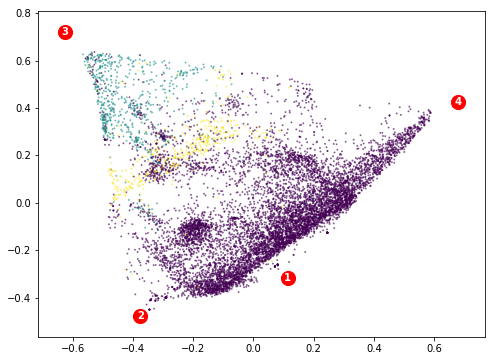

In [191]:
model.plot_at_pca_single(data, c=idx)

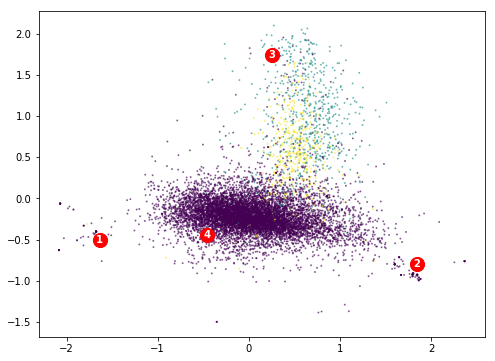

In [192]:
model.plot_pca_ats_data(data, c=idx)

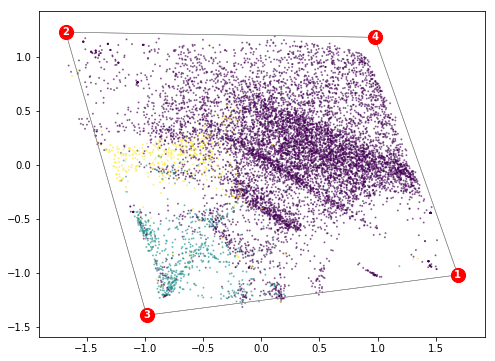

In [193]:
model.plot_at_mds(data, c=idx)

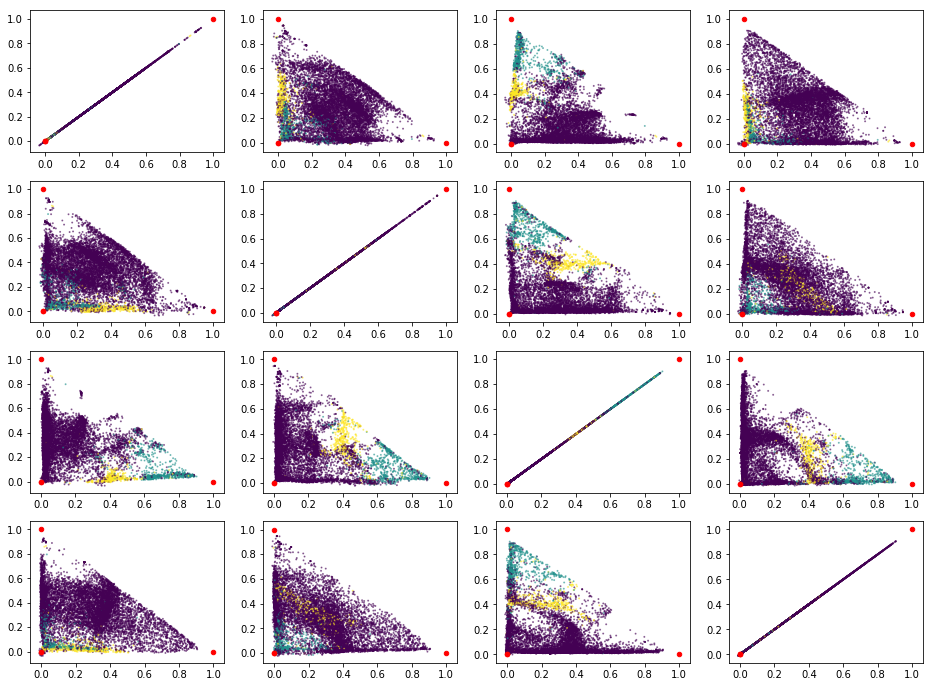

In [194]:
model.plot_at(data, c=idx)

In [ ]:
model.plot_at_pca(data, c=idx)